<a href="https://colab.research.google.com/github/SabinSapota/Machine-Learning/blob/main/kidney_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here,I am analysis whether a person have chronic kidney diseases or not.

for this  we want to predict whether person had ckd(chronic kidney diseases or not.In this data set class is dependent columns which we have to predict.

In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/resume/kidney_disease.csv') # this dataframe columns are not friendly 
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


here, columns are not user friendly so we will change to user friendly.

In [4]:
#loading another set of data to rename columns
df1=pd.read_csv('/content/drive/MyDrive/resume/data_description.txt',sep='-')
df1=df1.reset_index()
df1


,index,1. Features:
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [5]:
#assigning columns values to data frame
df.columns=df1['1. Features:'].values

In [6]:
df.columns

Index(['id', 'age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [7]:
df.head(3)
#now columns are more friendly

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [8]:
#function to change into numeric columns
def convert_num(df,col):
  df[col]=pd.to_numeric( df[col],errors='coerce')


In [9]:
#this are the list of columns that i will change into numeric columns
cols=['red blood cell count','packed cell volume','white blood cell count']
for col in cols:
  convert_num(df,col)

In [ ]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [10]:
# dropping the  id columns 
df.drop('id',axis=1,inplace=True)

In [11]:
#categoricals columns
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [12]:

#numericals columns
num_col=[col for col in df.columns if df[col].dtype!='O']
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [13]:
#missing colums
[col for col in df.columns if df[col].isna().any()]

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia']

In [14]:
# to see missing value
df.isna().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [15]:
# to see each unique value in categoricals columns
for col in cat_col:
  print(f' {col} column  has {df[col].nunique()} unique and are{df[col].unique()} ')

 red blood cells column  has 2 unique and are[nan 'normal' 'abnormal'] 
  pus cell column  has 2 unique and are['normal' 'abnormal' nan] 
 pus cell clumps column  has 2 unique and are['notpresent' 'present' nan] 
 bacteria column  has 2 unique and are['notpresent' 'present' nan] 
 ypertension column  has 2 unique and are['yes' 'no' nan] 
 diabetes mellitus column  has 5 unique and are['yes' 'no' ' yes' '\tno' '\tyes' nan] 
 coronary artery disease column  has 3 unique and are['no' 'yes' '\tno' nan] 
 appetite column  has 2 unique and are['good' 'poor' nan] 
 pedal edema column  has 2 unique and are['no' 'yes' nan] 
 anemia column  has 2 unique and are['no' 'yes' nan] 
 class column  has 3 unique and are['ckd' 'ckd\t' 'notckd'] 


In [16]:
#repalcing string 
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)
df['coronary artery disease'].replace({'\tno':'no'},inplace=True)


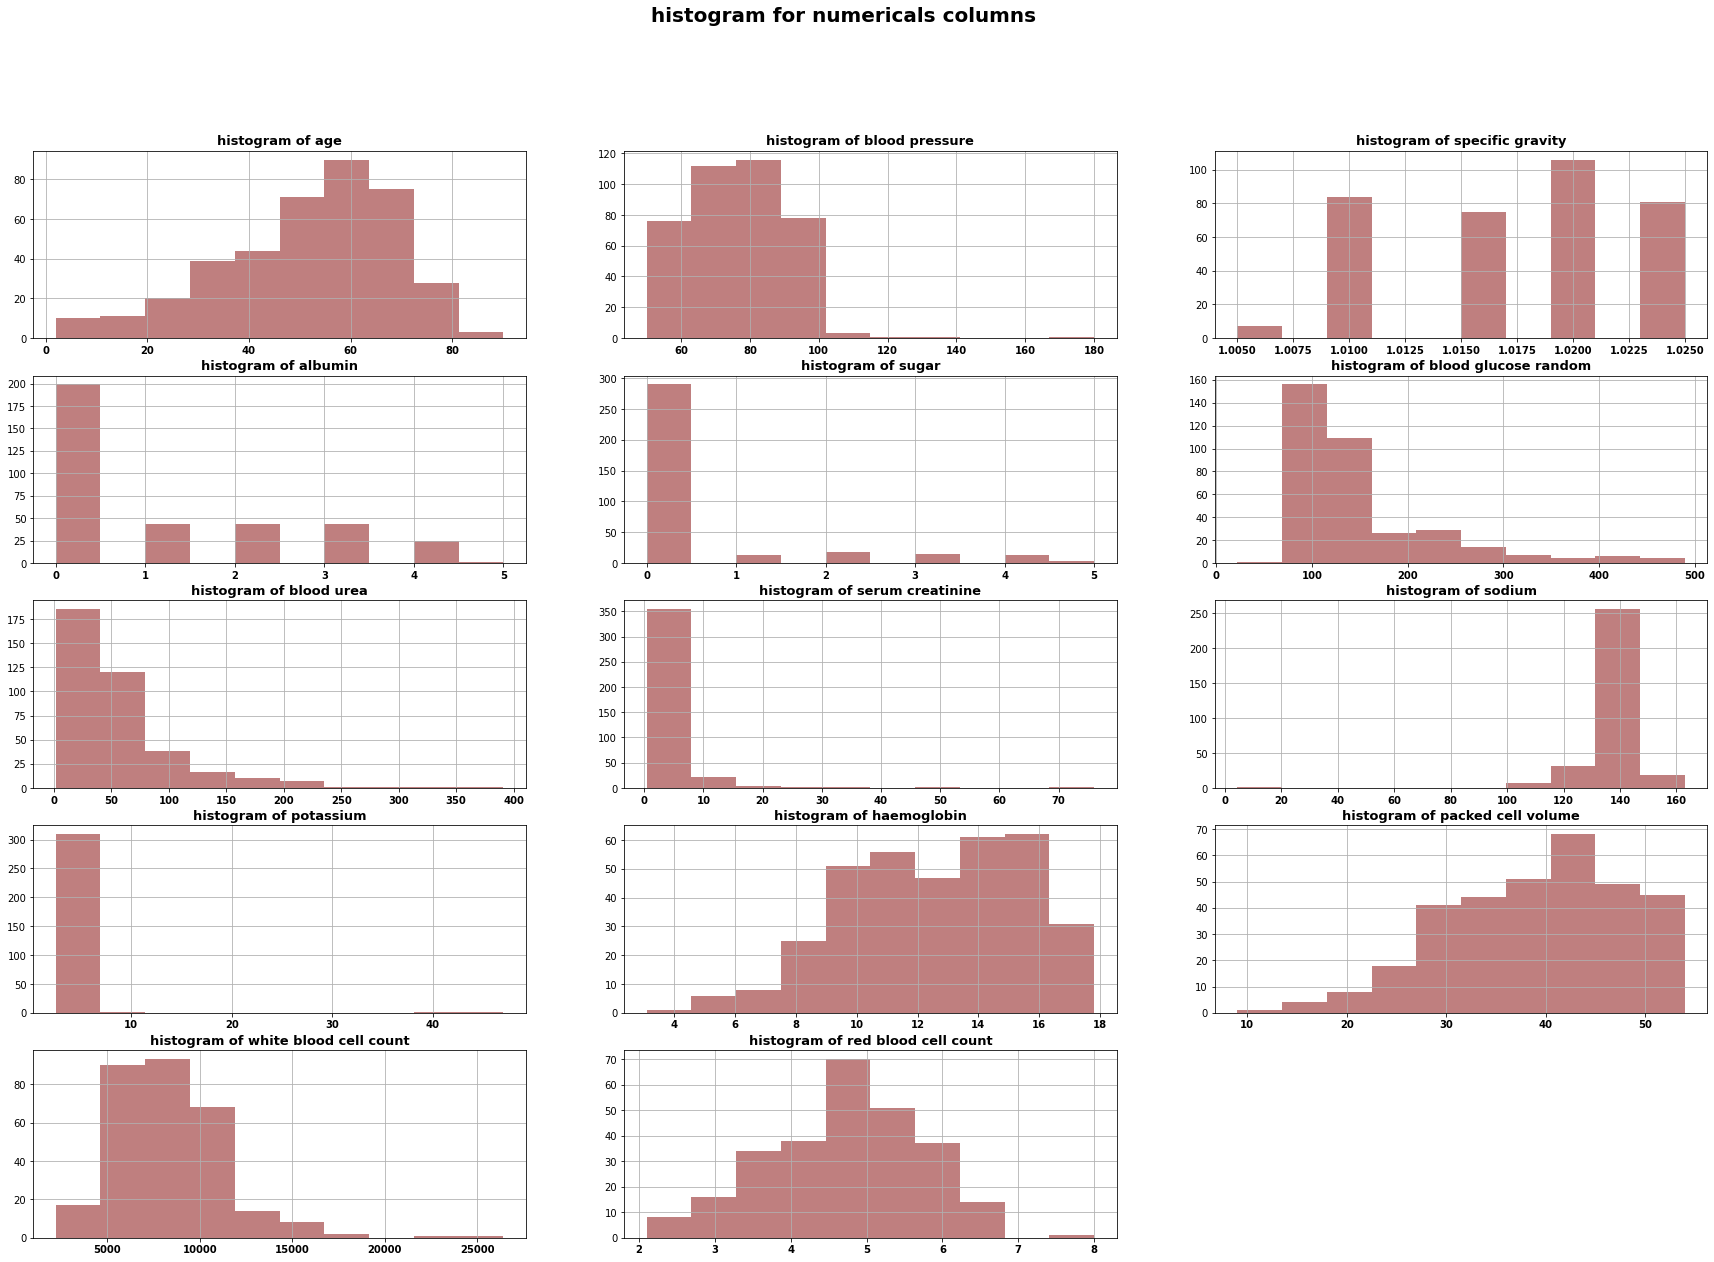

In [17]:
#histogram for numeric columns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
for i,col in enumerate(num_col):
  plt.suptitle('histogram for numericals columns',fontweight='bold',fontsize=20)
  plt.subplot(5,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  df[col].hist(color='maroon',alpha=0.5)
  plt.title(f'histogram of {col}',fontweight='bold',fontsize=13)
  

most of the data distribution is skewed.columns such as age,haemglobin, packed
cell volume are left skewed meaning most of the data lies towards right part and outliers exist towards left part.
    similary,blood pressure,blood urea and white blood cell count are right skewed.so,outliers exist in right hand side.







count plot for categoricals columns


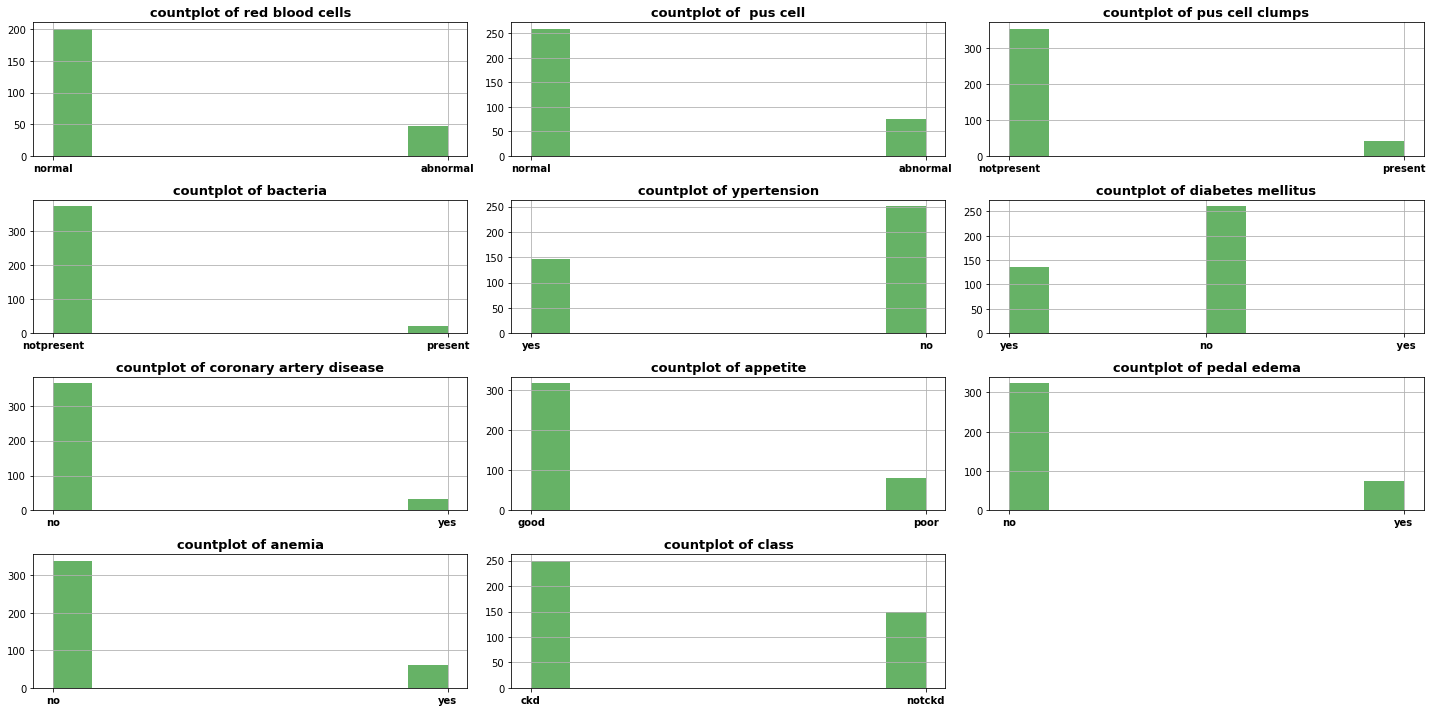

In [18]:
#count plot for categoricals columns
import seaborn as sns
plt.figure(figsize=(20,10))
print('count plot for categoricals columns')
for i,col in enumerate(cat_col):
  #plt.suptitle('count plot for categoricals columns',fontweight='bold',fontsize=20)
  plt.subplot(4,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  df[col].hist(color='green',alpha=.6)
  plt.title(f'countplot of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

As we can see all  count plot follow unqual proportion

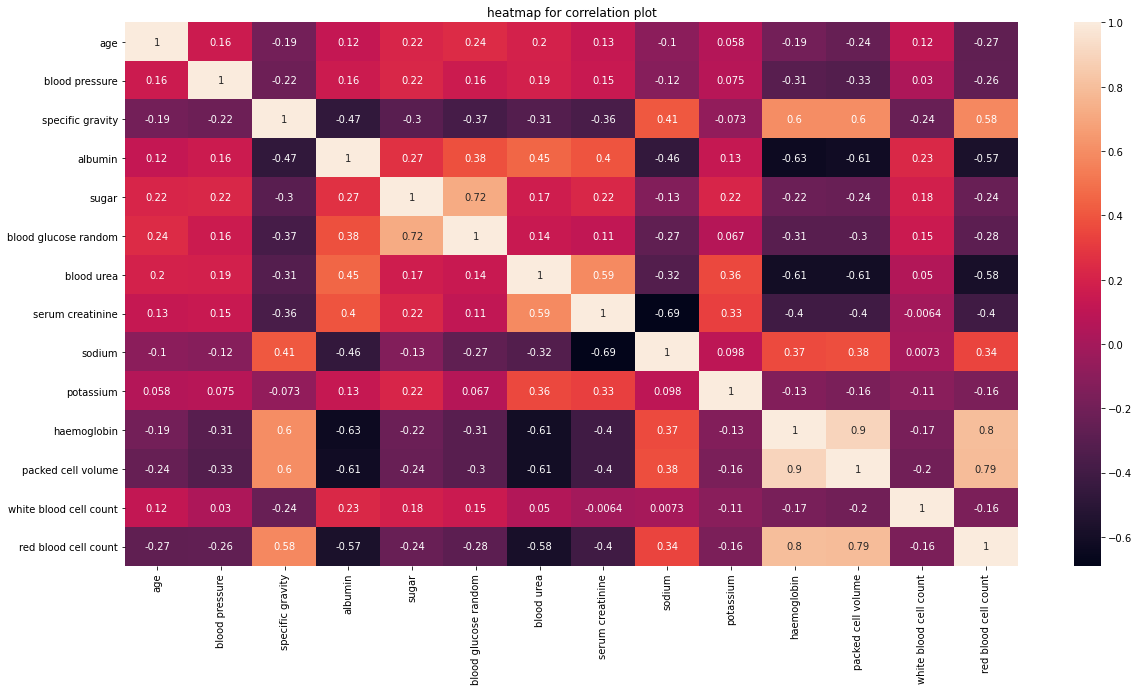

In [19]:
df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title('heatmap for correlation plot');

we can see red blood cell count has high correlation with haemoglobin,packed cell volume.blood glucose random has correlation with sugar.specific gravity has correlation with haemoglobin,packed cell volumne and red blood cell.

In [ ]:
#looking statitics by using goupby
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','max','min'])

count      mean  max  min
red blood cells class                            
abnormal        ckd        25  3.832000  5.6  2.5
normal          ckd        40  3.782500  8.0  2.1
                notckd    134  5.368657  6.5  4.4

In [ ]:
#function that generate violin plot
def violin(col):
  fig=px.violin(df,y=col,x='class',color='class',title=f' violin plot for {col}')
  fig.show()


In [ ]:
violin('red blood cell count')

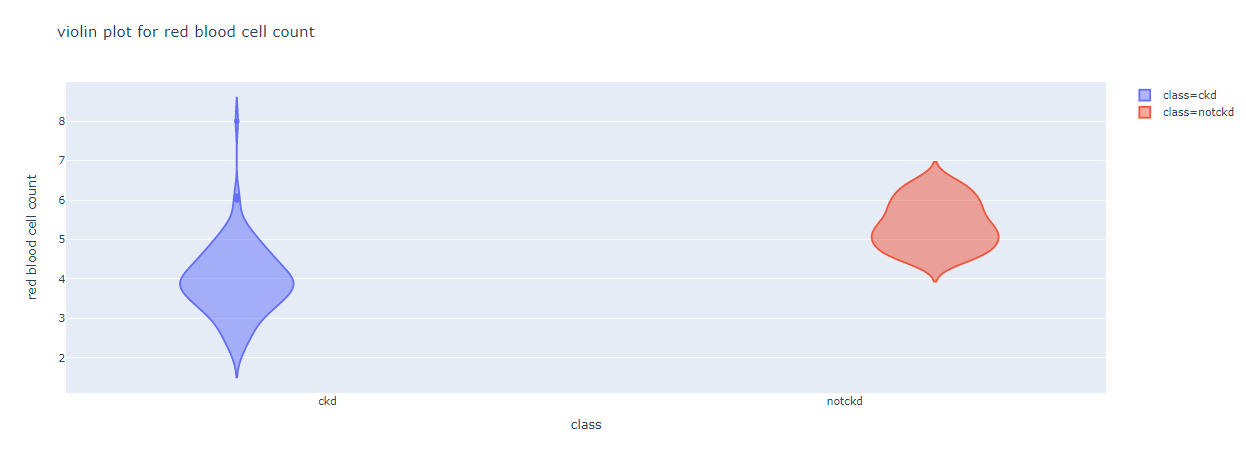

From above, we can see that ckd(chronic kidney disease) distrituion is wide where as person not suffering from ckd has limited distribution of the red blood cell count

In [ ]:
#function that generate scatter plot
def scatter(col1,col2):
  fig=px.scatter(df,x=col1,y=col2,color='class',title=f' scatter plot between {col1} and {col2}')
  fig.show()



In [ ]:
scatter('haemoglobin','packed cell volume')

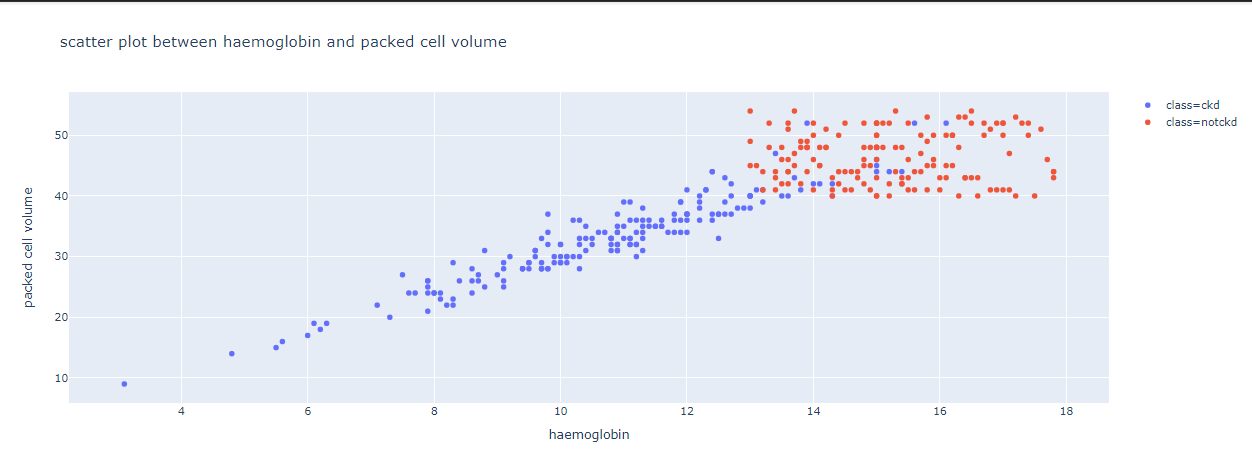

there is linear relationship between packed cell volume and haemoglobin for ckd where as for not ckd there is no linear relationship

In [ ]:
def facet_grid(col):
  g = sns.FacetGrid(df,hue='class',height=6,aspect=3)
  g.map(sns.kdeplot,col)
  g.fig.suptitle(f' kde plot for {col}')
  g.add_legend();


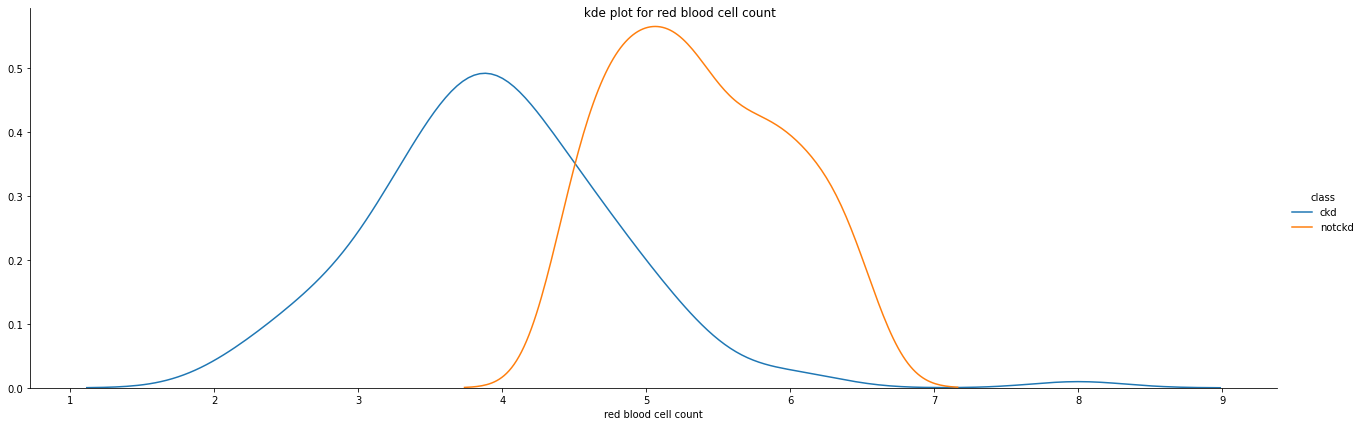

In [ ]:
facet_grid('red blood cell count')

red blood cell count distribution for ckd is wide than compared to not ckd

In [ ]:
scatter('red blood cell count','haemoglobin')

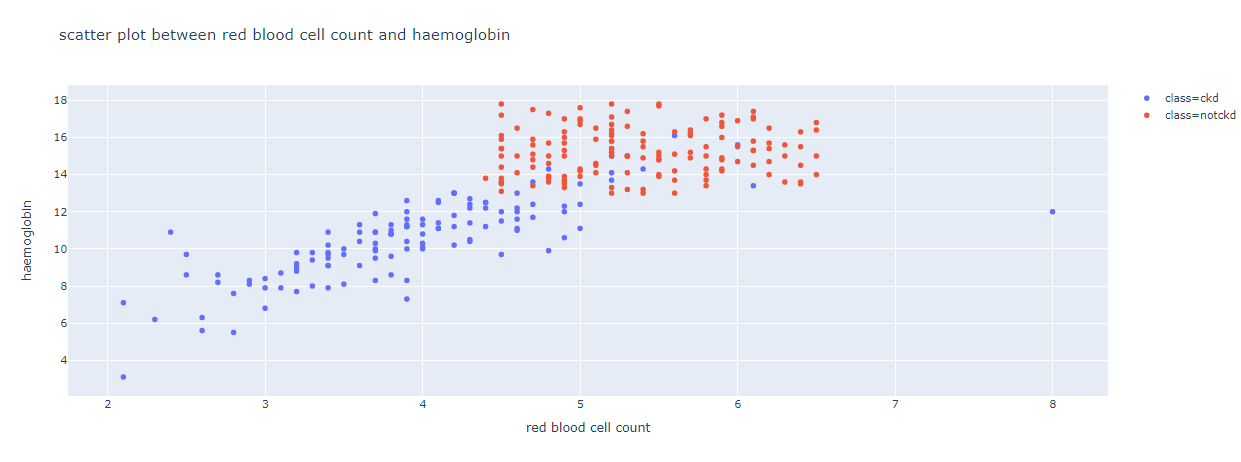

there is linear relationship between red blood cell count and haemoglobin for ckd where as for not ckd there is no linear relationship

In [ ]:
scatter('packed cell volume','haemoglobin')

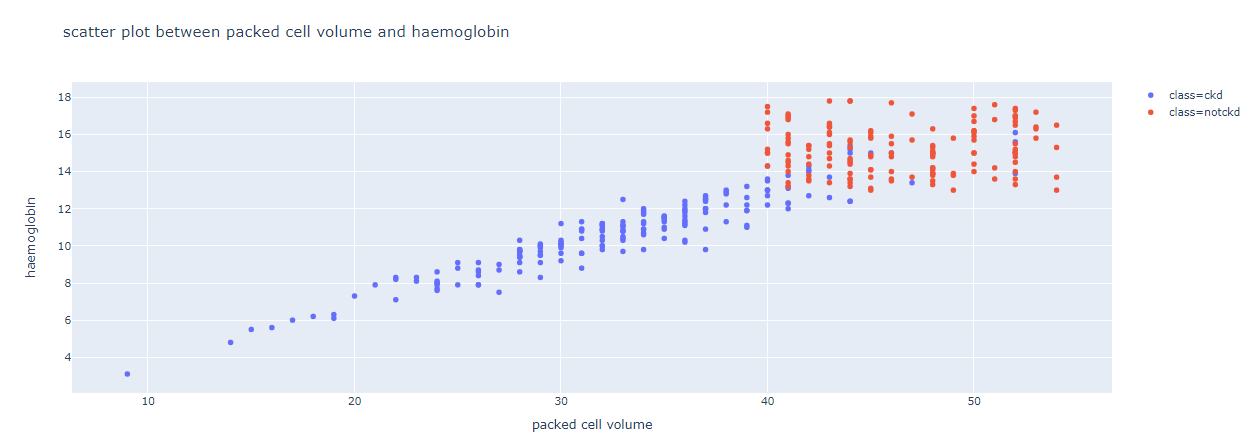

there is linear relationship between packed cell volume and haemoglobin for ckd where as for not ckd there is no linear relationship

In [ ]:
violin('red blood cell count')

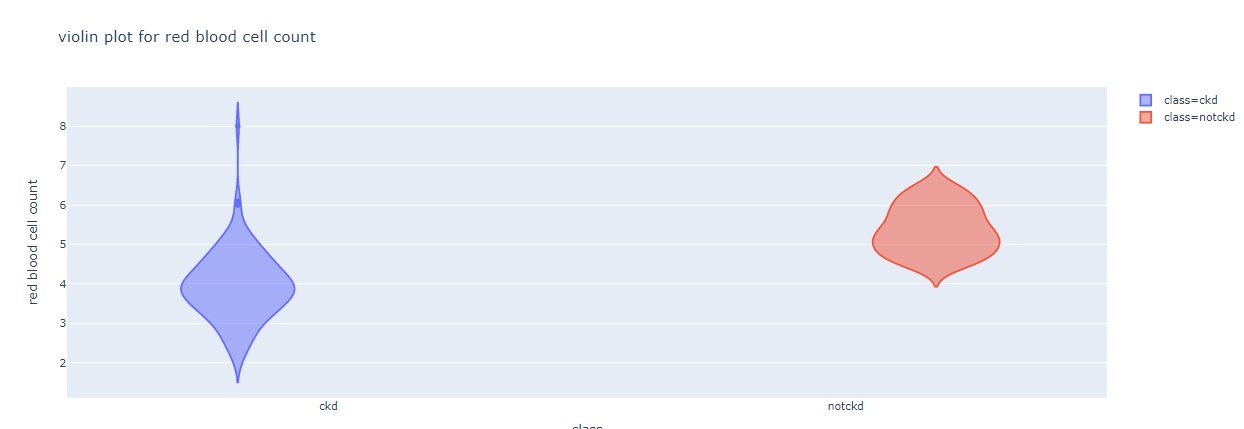

From above, we can see that ckd(chronic kidney disease) distrituion is wide where as person not suffering from ckd has limited distribution of the red blood cell count

In [ ]:
violin('packed cell volume')

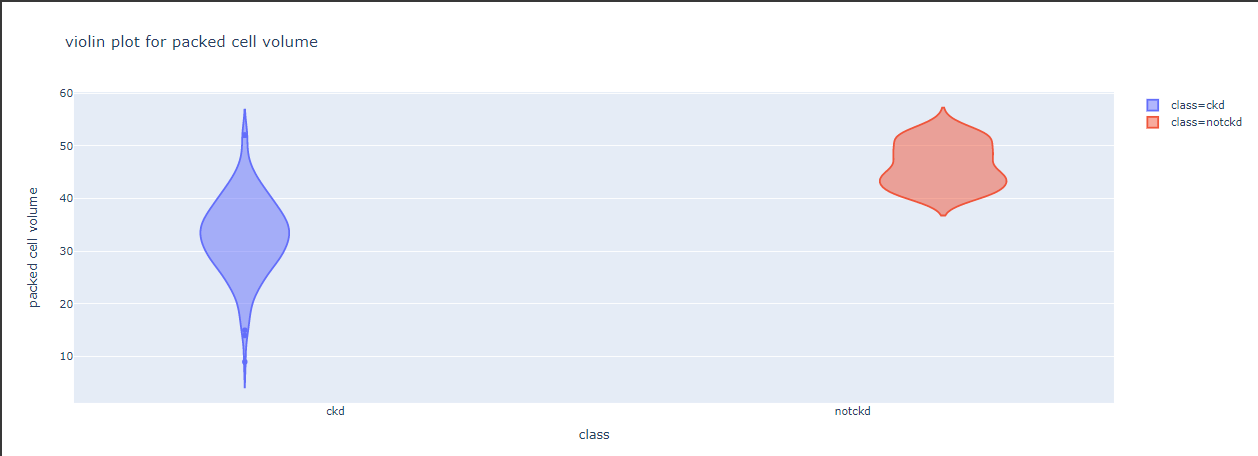

From above, we can see that ckd(chronic kidney disease) distrituion is wide where as person not suffering from ckd has limited distribution of the packed cell volume

In [ ]:
scatter('packed cell volume','albumin')

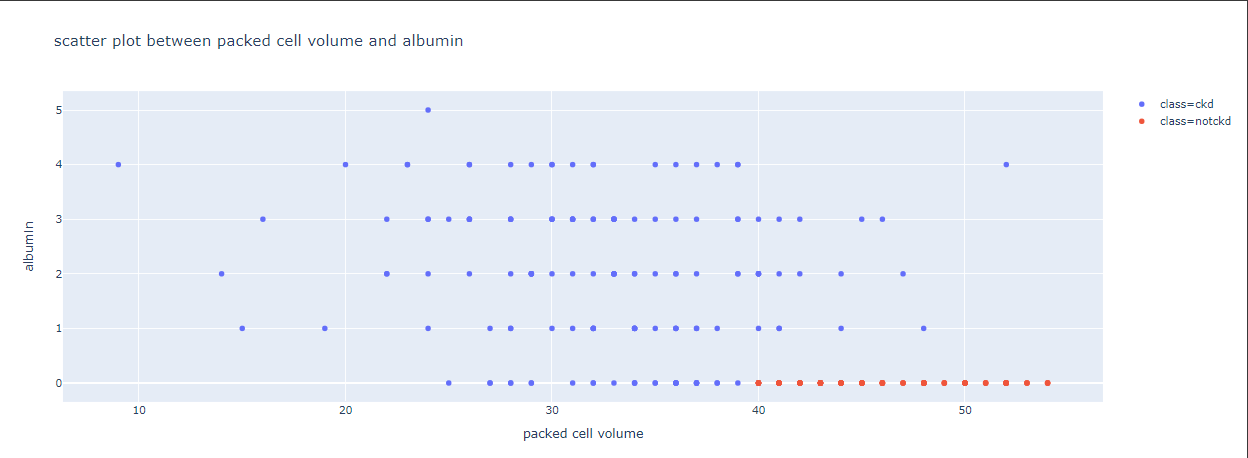

From above, we can see that  for person not suffering from ckd albumin is zero and packed cell volumne is in range between 40 and 56.

In [20]:
#looking for nan value in dataset
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

**Filling nan value**

---
we can fill nan value in different approch. but here i used random sample filling.I used this ramdom sampling because it preserve the distribution and it seems practical to me.However  we can fill orther approch such as for numerical columns by median , bfill,ffill.similarly for the categorical data  we can use mode.


In [22]:
#function that fill nan value by random sample
def ramdom_sample_imputation(col):
  random_sample=df[col].dropna().sample(df[col].isna().sum())
  random_sample.index=df[df[col].isnull()].index
  df.loc[df[col].isnull(),col]=random_sample

In [26]:
ramdom_sample_imputation('red blood cells')

In [27]:
df['red blood cells'].value_counts(dropna=False)

normal      323
abnormal     77
Name: red blood cells, dtype: int64

In [28]:
#nan value in numerical columns before apply function
df[num_col].isna().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [29]:
# applyng function
for col in num_col:
  ramdom_sample_imputation(col)

In [30]:
#  nan after applying function
df[num_col].isna().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [31]:
# nan value in categoricals columns
df[cat_col].isna().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [32]:
# applying function
for i in cat_col:
  ramdom_sample_imputation(i)

In [33]:
# nan after applying function 
df[cat_col].isna().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

**Feature Encoding**

here ,i need to convert categorical columns to numeric columns.I am using one hot encoder

In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')

In [46]:
##reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
for col in cat_col:
  df[col]=ohe.fit_transform(df[col].values.reshape(-1,1)).toarray()

In [47]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,0.0,1.0,0.0,0.0,121.0,36.0,1.2,135.0,4.1,15.4,44.0,7800.0,5.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,153.0,18.0,0.8,150.0,3.4,11.3,38.0,6000.0,2.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,53.0,1.8,133.0,3.8,9.6,31.0,7500.0,3.2,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,26.0,1.4,129.0,3.8,11.6,35.0,7300.0,4.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df.shape

(400, 25)

**Feature extraction**
so to avoid over fitting problem, i am using feature extraction where i pass only important feature to my model

In [49]:
from sklearn.feature_selection import SelectKBest   # importing  library
from sklearn.feature_selection import chi2

In [56]:
X=df.drop('class',axis=1)  # input feature(independent variable)
y=df['class']   #dependent variable

In [64]:
feature_rank=SelectKBest(score_func=chi2,k=15)
fit=feature_rank.fit(X,y)

In [65]:
dfscore=pd.DataFrame(fit.scores_)  # changing feature_score into  data frame
dfcolumns=pd.DataFrame(X.columns)

In [87]:
df1=pd.concat([dfcolumns,dfscore],axis=1)   # concating the data frame
df1.columns=['feature','feature_score']
df1=df1.nlargest(10,'feature_score').reset_index()
df1=df1.drop('index',axis=1)
df1.feature_score=df1.feature_score.apply(lambda x:round(x,1))
df1

,feature,feature_score
0,white blood cell count,9088.6
1,blood glucose random,2056.4
2,blood urea,2047.4
3,serum creatinine,335.4
4,packed cell volume,300.9
5,albumin,205.5
6,haemoglobin,128.0
7,age,113.0
8,sugar,107.4
9,ypertension,85.6


In [86]:
import plotly.express as px
px.bar(data_frame=df1,x='feature',y='feature_score',text='feature_score',title='top feature')

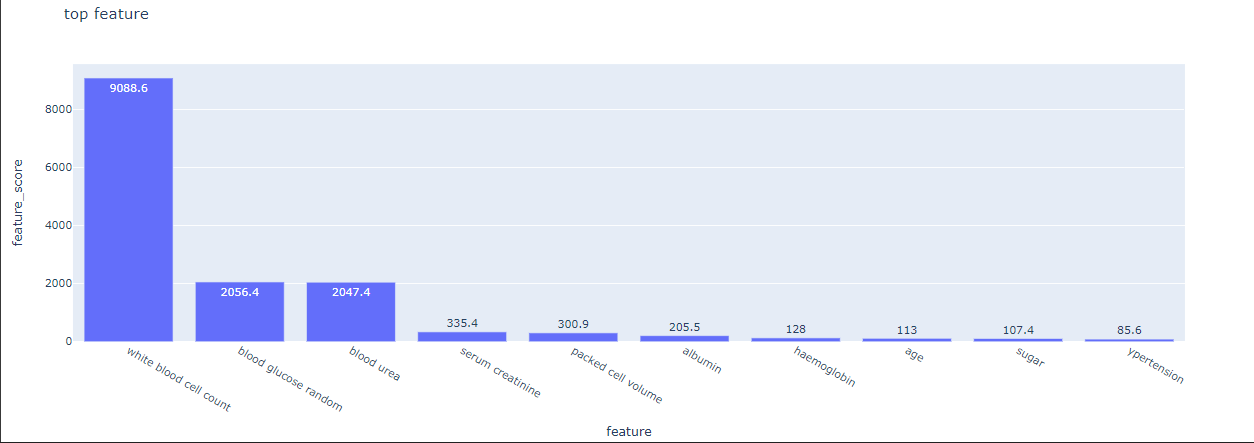

So, these are the plot for my important feature which i will used to train the model

In [93]:
feature=list(df1.feature[0:6])
feature
X=X[feature]  # passing only the feature which have high score

In [92]:
from sklearn.model_selection import train_test_split


In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [97]:
from xgboost import XGBClassifier

In [102]:
xgb_classifier=XGBClassifier()  # creatig object

In [99]:

#tumming model
params={
    'learning_rate':[0.01,0.05,0.5,1],
    'max_depth':[5,8,10],
    'gamma':[0,0.1,0.2,0.3,0.4],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.3,0.4,0.7]


}

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
random_search=RandomizedSearchCV(xgb_classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [104]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [105]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [106]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 1}

In [108]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [109]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [111]:
y_pred=classifier.predict(X_test)
y_pred

array([0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.])

In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [114]:
confusion_matrix(y_test,y_pred)

array([[51,  1],
       [ 1, 27]])

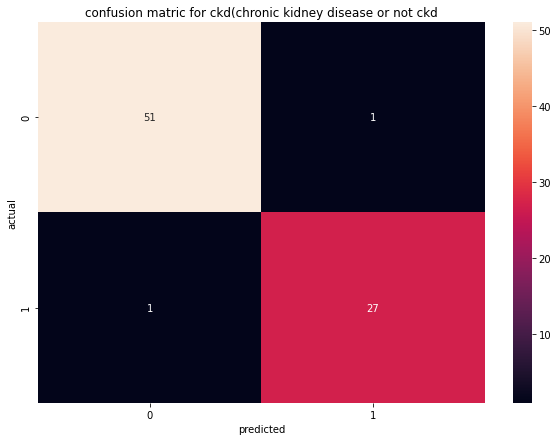

In [121]:

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('confusion matric for ckd(chronic kidney disease or not ckd')
plt.xlabel('predicted')
plt.ylabel('actual');


In [115]:
# accuracy of the model
accuracy_score(y_test,y_pred)

0.975

**Root Mean sqaure error**

In [125]:
from sklearn.metrics import mean_squared_error


In [128]:
classifier.fit(X_train,y_train)
predict_train = classifier.predict(X_train)
predict_test  = classifier.predict(X_test)
print('RSME on train data',mean_squared_error(y_train, predict_train)**(0.5))
print('RSME on test data',mean_squared_error(y_test, predict_test)**(0.5))


RSME on train data 0.11180339887498948
RSME on test data 0.15811388300841897


**Mean square error**

In [130]:
print('mean sqaured error on train data',mean_squared_error(y_train, predict_train))
print('meansquared error on test data',mean_squared_error(y_test, predict_test))

mean sqaured error on train data 0.0125
meansquared error on test data 0.025
